In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
beer_df = pd.read_csv("Beer.csv")
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
name        20 non-null object
calories    20 non-null int64
sodium      20 non-null int64
alcohol     20 non-null float64
cost        20 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 880.0+ bytes


In [4]:
beer_df.head(5)

name  calories  sodium  alcohol  cost
0    Budweiser       144      15      4.7  0.43
1      Schlitz       151      19      4.9  0.43
2    Lowenbrau       157      15      0.9  0.48
3  Kronenbourg       170       7      5.2  0.73
4     Heineken       152      11      5.0  0.77

# Scale the features

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_beer_df = scaler.fit_transform(beer_df[['calories','sodium','alcohol','cost']])


# As there are 4 features, it is difficult to plot and visualize them.
1. For high dimensional data, the following techniques can be used to discover the possible number of clusters.
 a) Dendogram
 b) Elbow method.


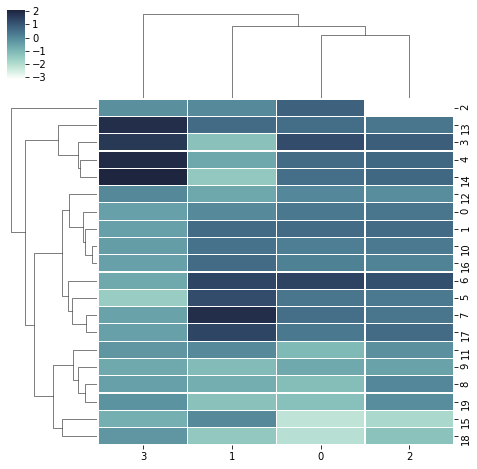

In [10]:
# A dendogram can be drawn usign clustermap() method in seaborn.

cmap = sn.cubehelix_palette(as_cmap = True, rot = -.3, light = 1)

sn.clustermap(scaled_beer_df, cmap = cmap, linewidths=.2, figsize=(8,8))

In [11]:
beer_df.ix[[10,16]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


name  calories  sodium  alcohol  cost
10  Coors       140      18      4.6  0.44
16  Hamms       139      19      4.4  0.43

In [12]:
beer_df.ix[[2,18]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


name  calories  sodium  alcohol  cost
2             Lowenbrau       157      15      0.9  0.48
18  Olympia_Goled_Light        72       6      2.9  0.46

# Finding optimal number of clusters using elbow method

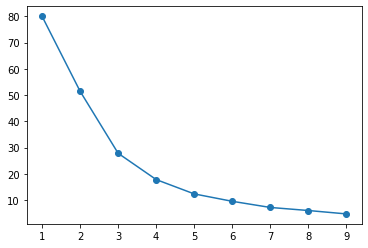

In [17]:
from sklearn.cluster import KMeans
cluster_range = range(1,10)

cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker='o')
